In [14]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
len(x_train)


60000

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [26]:
#update xtrain,ytrain to get values between 0-1
x_train = x_train / 255
x_test = x_test / 255

In [27]:
#Creating the model
import tensorflow as tf
from tensorflow import keras
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
#train using sgd
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6465 - accuracy: 0.8401 - val_loss: 0.3554 - val_accuracy: 0.9030
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.9062 - val_loss: 0.2947 - val_accuracy: 0.9191
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2910 - accuracy: 0.9188 - val_loss: 0.2625 - val_accuracy: 0.9266
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2618 - accuracy: 0.9266 - val_loss: 0.2419 - val_accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2398 - accuracy: 0.9333 - val_loss: 0.2251 - val_accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2214 - accuracy: 0.9385 - val_loss: 0.2079 - val_accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2062 - accuracy: 0.9428 - val_loss: 0.1966 - val_accuracy:

In [31]:
#evaluate network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9538
Loss=0.166
Accuracy=0.954


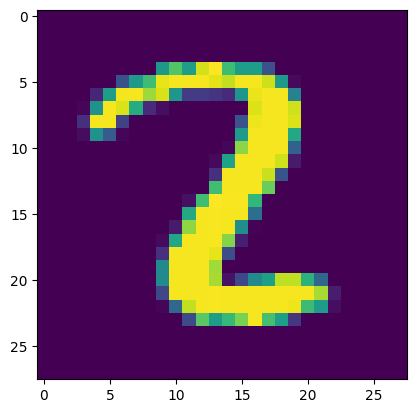

In [36]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [37]:

predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is= 2


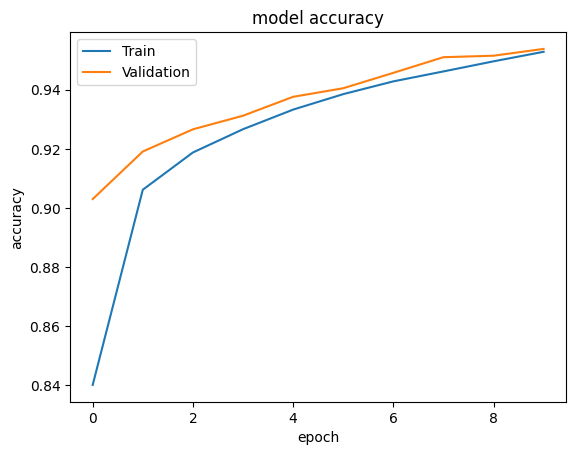

In [34]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

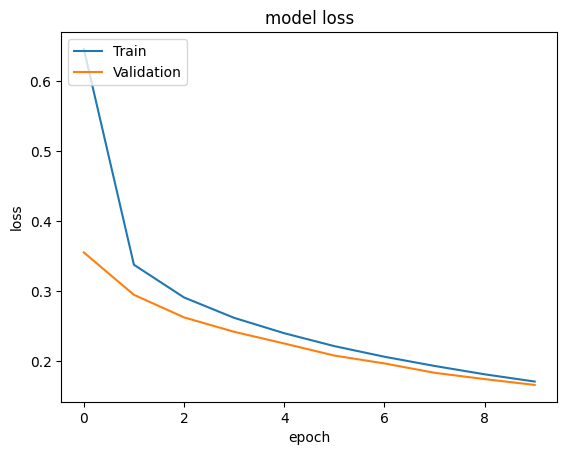

In [35]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()